## Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [3]:
# Load the insurance dataset
insurance_data_file_path = 'D:/HTML/Hannan/medical_insurance_premium.csv'
insurance_data = pd.read_csv(insurance_data_file_path)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Encoding

In [5]:
# Encoding categorical variables using one-hot encoding
insurance_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

insurance_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


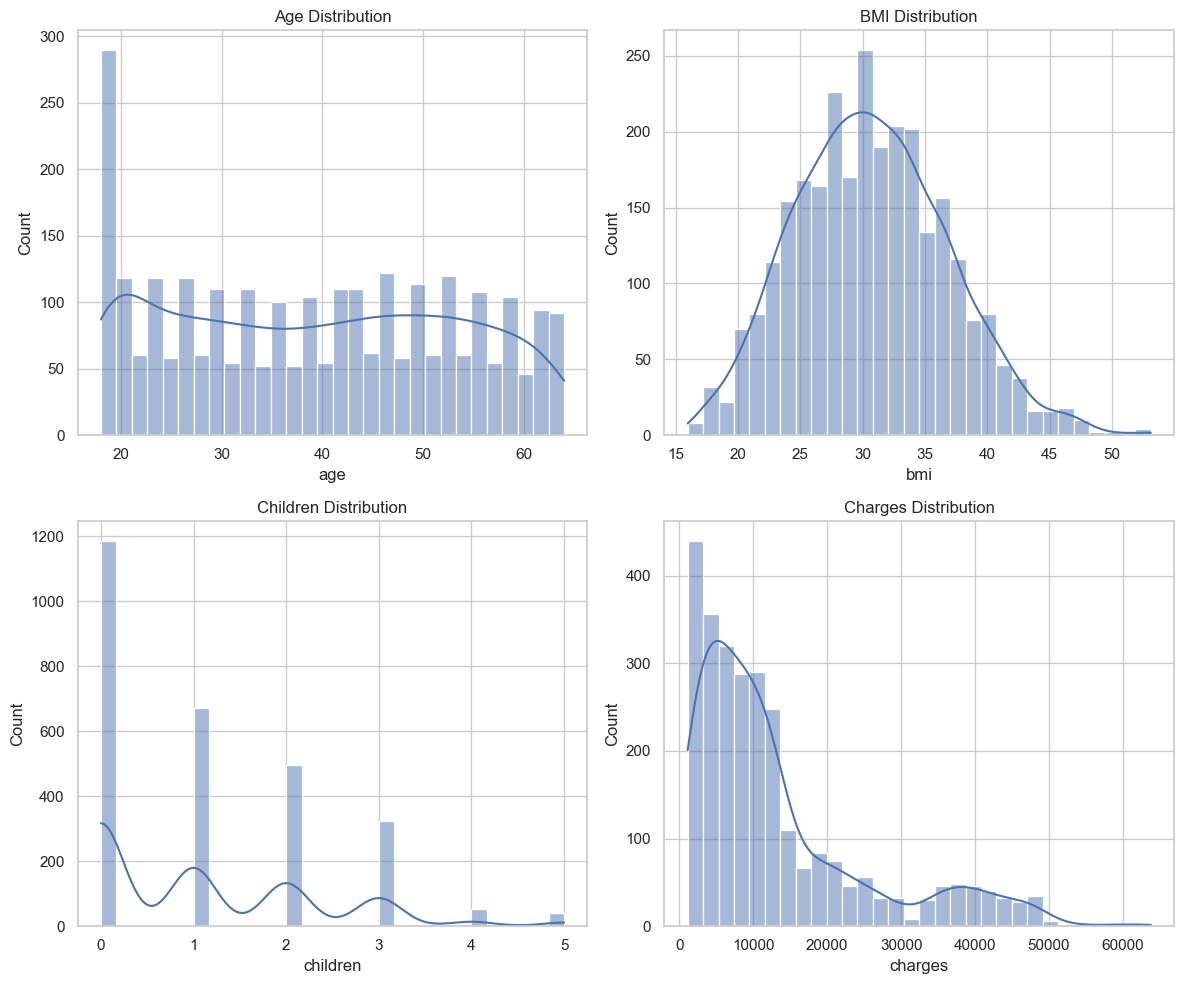

In [6]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")                    # To have a white grid background.

# Plotting distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # 2 rows and 2 columns of plots & overall size width = 12 inches and height = 10 inches

sns.histplot(insurance_data['age'], bins=30, kde=True, ax=axes[0, 0])   # 30 bars, kde=True adds a smooth curve. The plot is present in 0th row and 0th column
axes[0, 0].set_title('Age Distribution')                  

sns.histplot(insurance_data['bmi'], bins=30, kde=True, ax=axes[0, 1])   # 30 bars, kde=True adds a smooth curve. The plot is present in 0th row and 1st column
axes[0, 1].set_title('BMI Distribution')

sns.histplot(insurance_data['children'], bins=30, kde=True, ax=axes[1, 0])    # 30 bars, kde=True adds a smooth curve. The plot is present in 1st row and 0th column
axes[1, 0].set_title('Children Distribution')

sns.histplot(insurance_data['charges'], bins=30, kde=True, ax=axes[1, 1])    # 30 bars, kde=True adds a smooth curve. The plot is present in 1st row and 1st column
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()  # To prevent overlapping and make them look neat.
plt.show()


In [7]:

# Applying log transformation to 'charges' to reduce skewness
insurance_encoded['charges'] = np.log1p(insurance_encoded['charges'])  # applying logarthmic transformation to charges column

# Standardizing 'age' and 'bmi' features
scaler = StandardScaler()     # makes sure all our data is in a similar range
insurance_encoded[['age', 'bmi']] = scaler.fit_transform(insurance_encoded[['age', 'bmi']])

insurance_encoded.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.428353,-0.457114,0,9.734236,True,False,False,True,False,False,False,True
1,-1.499381,0.500731,1,7.453882,False,True,True,False,False,False,True,False
2,-0.789099,0.375085,3,8.400763,False,True,True,False,False,False,True,False
3,-0.433959,-1.304814,0,9.998137,False,True,True,False,False,True,False,False
4,-0.504987,-0.297201,0,8.260455,False,True,True,False,False,True,False,False


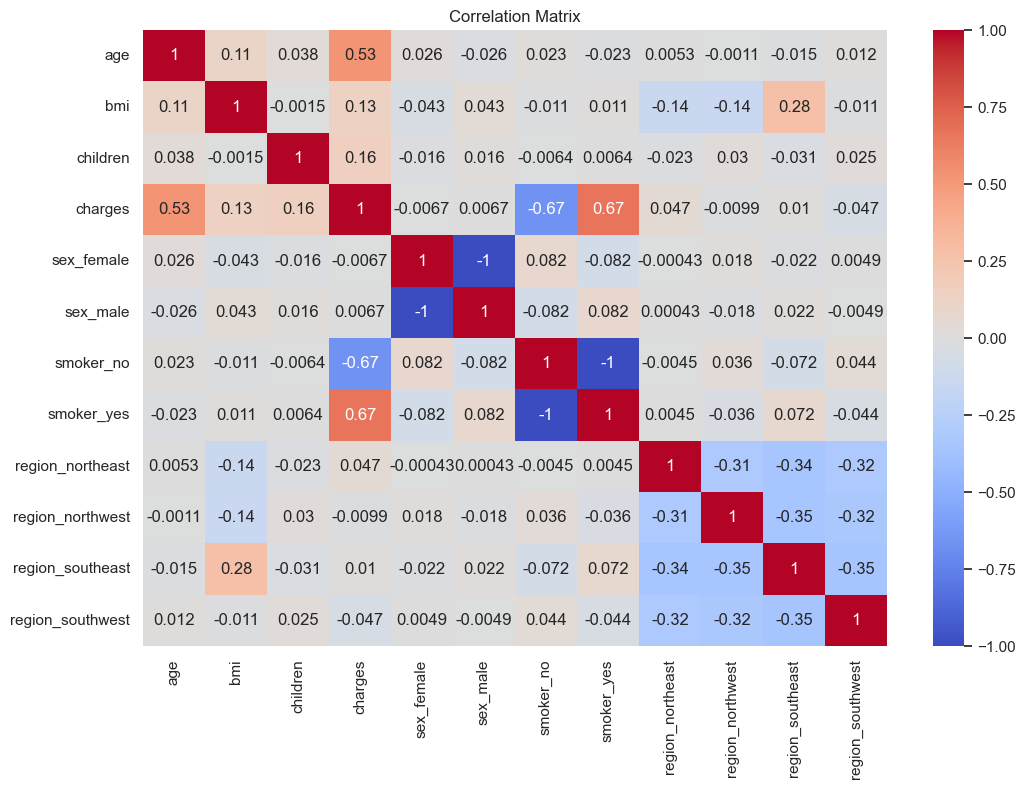

In [8]:
# Plotting correlations between features and the target variable 'charges'

correlation_matrix = insurance_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')    
plt.title("Correlation Matrix")
plt.show()

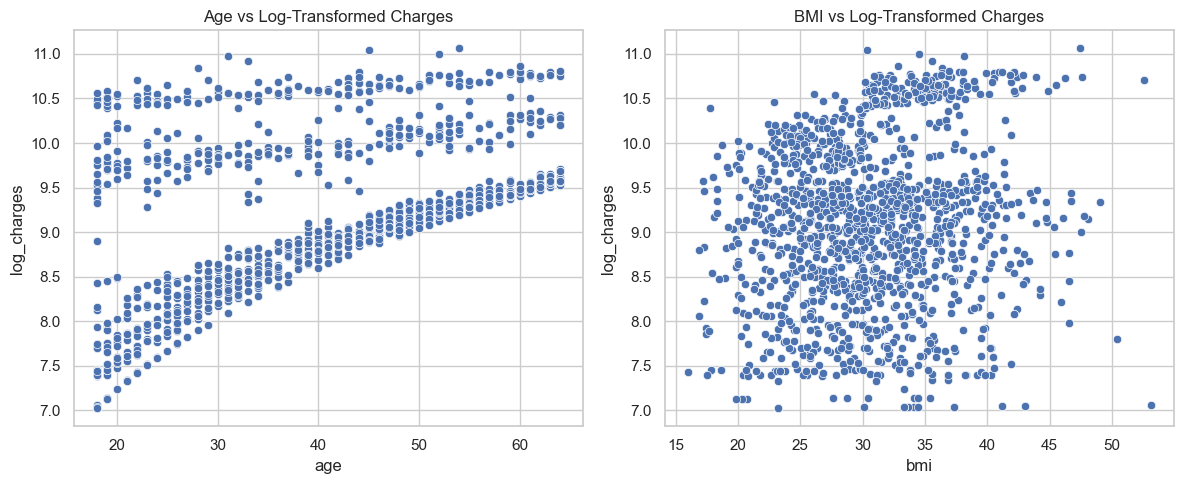

In [9]:
# Plotting scatter plots for continuous variables against 'charges'
# Log-transforming the 'charges' column for plotting

insurance_data['log_charges'] = np.log1p(insurance_data['charges'])  # Helps visualize the relationship between 'charges' and other variables more clearly.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.scatterplot(data=insurance_data, x='age', y='log_charges', ax=axes[0])
axes[0].set_title('Age vs Log-Transformed Charges')

sns.scatterplot(data=insurance_data, x='bmi', y='log_charges', ax=axes[1])
axes[1].set_title('BMI vs Log-Transformed Charges')

plt.tight_layout()
plt.show()


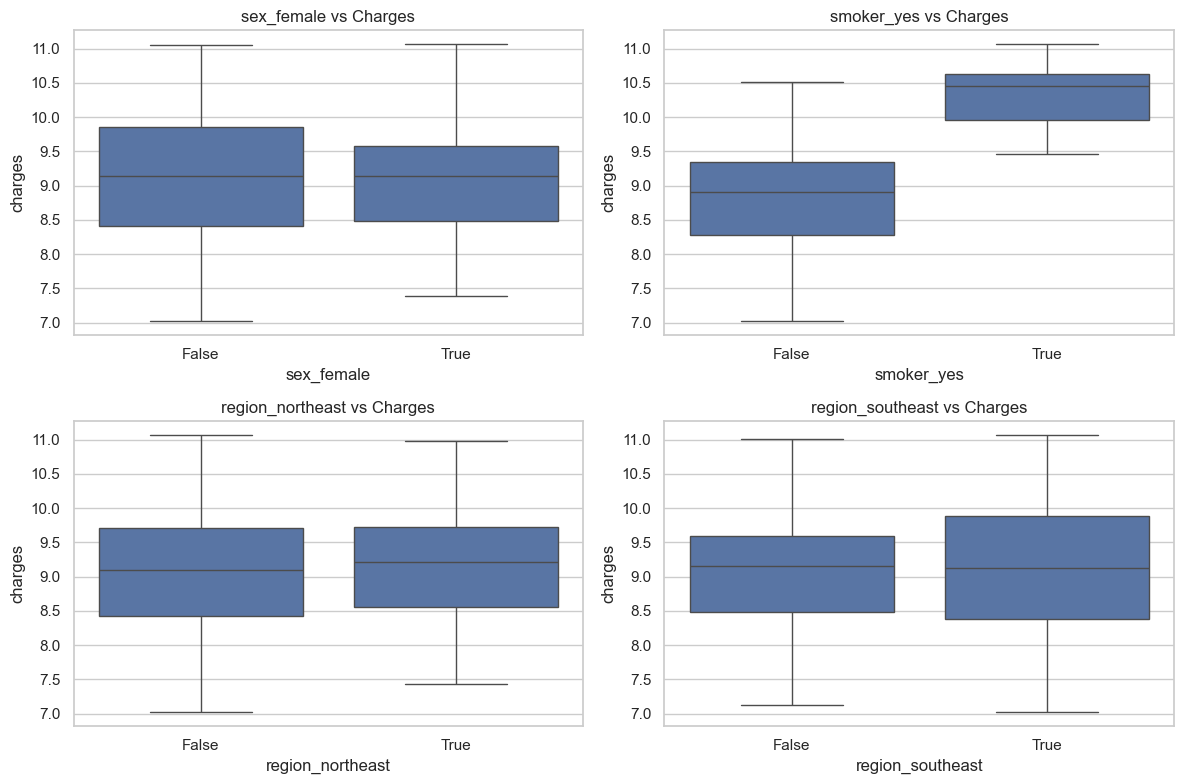

In [10]:
# Plotting box plots for categorical variables against 'charges'

categorical_features = ['sex_female',  'smoker_yes', 'region_northeast', 'region_southeast']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=insurance_encoded, x=feature, y='charges', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Charges')

plt.tight_layout()
plt.show()

In [11]:
# Splitting the dataset into training and testing sets

X = insurance_encoded.drop('charges', axis=1)  # Features
y = insurance_encoded['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting charges for the test set
y_pred = linear_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)


(0.23616353506405238, 0.7486523220161752)

In [12]:
# Retrieving the coefficients of the linear regression model for the finding the contribution

coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_yes,0.780183
age,0.486133
children,0.097488
region_northeast,0.083774
bmi,0.076646
sex_female,0.034880
region_northwest,0.031145
sex_male,-0.034880
region_southwest,-0.040889
region_southeast,-0.074030


Smoking status is the most influential factor in determining medical charges, followed by age and BMI.

Geographical region and gender have smaller impacts.

In [13]:
# Training Ridge Regression model

ridge_model = Ridge(alpha=1.0)    # Moderate level of regularization, no problems of underfitting and overfitting
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluating Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Training Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Retrieving coefficients for comparison
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Ridge Coefficient'])
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Lasso Coefficient'])

(mse_ridge, r2_ridge, mse_lasso, r2_lasso), coefficients_ridge.join(coefficients_lasso)


((0.2361857668423367,
  0.7486286608449122,
  0.2429687732883735,
  0.7414095407572228),
                   Ridge Coefficient  Lasso Coefficient
 age                        0.485884       4.777780e-01
 bmi                        0.076591       5.556986e-02
 children                   0.097471       9.046476e-02
 sex_female                 0.034779       2.328421e-02
 sex_male                  -0.034779      -0.000000e+00
 smoker_no                 -0.779088      -1.491304e+00
 smoker_yes                 0.779088       7.746687e-16
 region_northeast           0.083612       4.495057e-02
 region_northwest           0.031033       0.000000e+00
 region_southeast          -0.073765      -1.662056e-02
 region_southwest          -0.040881      -0.000000e+00)

**Conclusion:**

The model's predictions are greatly influenced by whether a person smokes, with age being the next most important factor. This matches our previous findings that smoking and age are key factors in determining medical charges.

These results highlight that smoking status and age are crucial in predicting medical costs, showing that the model effectively captures these important aspects.